Utiliser la librairy Xplique pour expliquer la logiquedu modele avec des visu tres parlant et super interessant. (trop kiffant c pas dur en  plus)


In [13]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
from xplique.attributions import GradCAM
import matplotlib.pyplot as plt
import os


importer les données, les resize et les labeliser

In [26]:

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [27]:
base_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))  # Remonte d'un niveau
save_dir = os.path.join(base_dir, 'src', 'models', 'sauvegardes_modeles')
#print(os.listdir(save_dir))
model_to_load = 'modele_cifar10_20241101_163923.h5' #os.listdir(save_dir)[i eme sauvegarde]
print(f"Chargement du modèle : {model_to_load}")

model_path = os.path.join(save_dir, model_to_load) 
model = load_model(model_path)

model.summary()

# Évaluation du modèle
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Précision sur les données de test : {test_accuracy:.2f}')
print(f'Précision sur les données de test : {test_loss:.2f}')


Chargement du modèle : modele_cifar10_20241101_163923.h5


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

Une fois les données prêtes et le modèle importé, expliquons le modèle CNN.

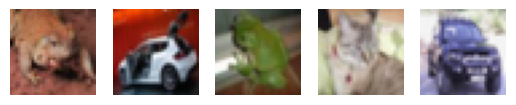

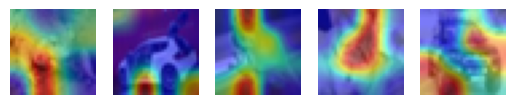

In [32]:

# Utiliser GradCAM pour visualiser les zones importantes pour les prédictions du modèle
# Charger un sous-ensemble de données d'image pour tester l'explication GradCAM

X = x_test[5:10]  
Y = y_test[5:10]

# Créer un explainer GradCAM pour ton modèle
explainer = GradCAM(model) # boucler sur tout les diff explainer.

# Générer les explications pour les images sélectionnées
explanations = explainer.explain(X, Y)

# Afficher les explications superposées sur les images d'origine
for i in range(len(X)):
    plt.subplot(1, len(X), i + 1)
    plt.imshow(X[i])  # Afficher l'image d'origine
 #   plt.imshow(explanations[i], cmap="jet", alpha=0.5)  # Superposer l'attribution
    plt.axis('off')
plt.show()
for i in range(len(X)):
    plt.subplot(1, len(X), i + 1)
    plt.imshow(X[i])  # Afficher l'image d'origine
    plt.imshow(explanations[i], cmap="jet", alpha=0.5)  # Superposer l'attribution
    plt.axis('off')
plt.show()



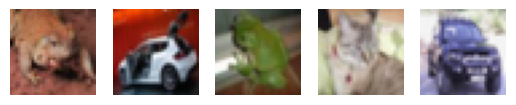

Method: Saliency


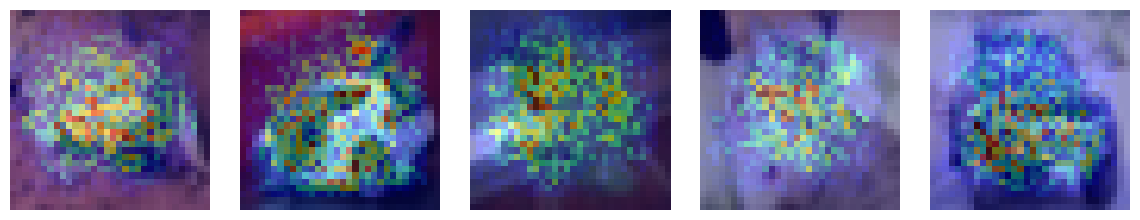



Method: GradientInput


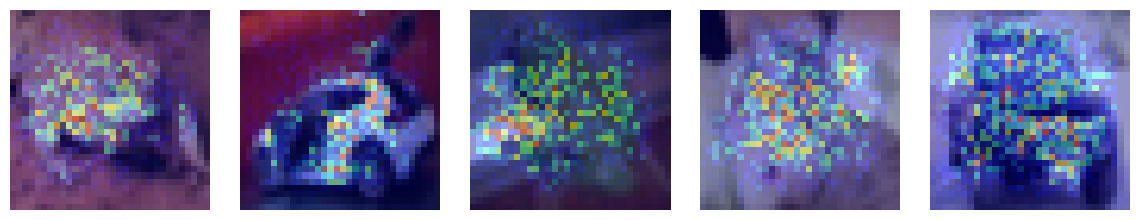



Method: GuidedBackprop


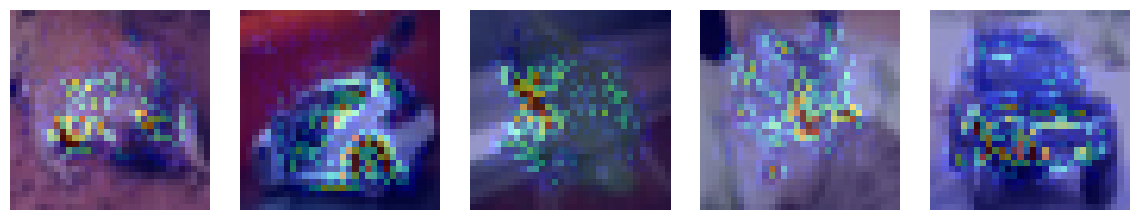



Method: IntegratedGradients


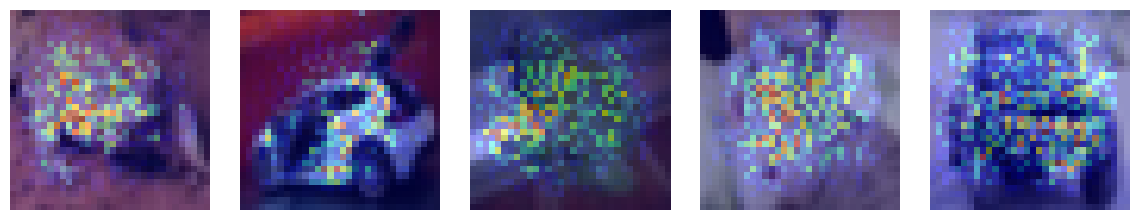



Method: SmoothGrad


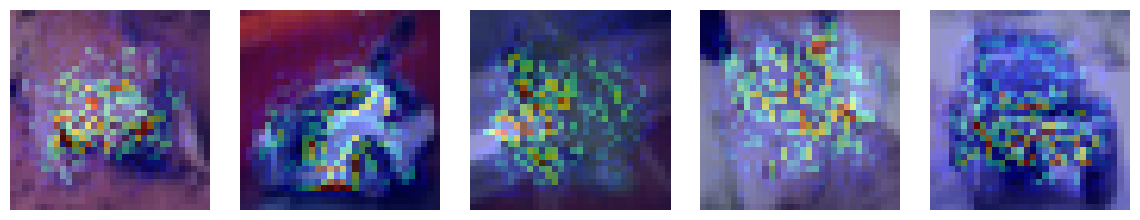



Method: SquareGrad


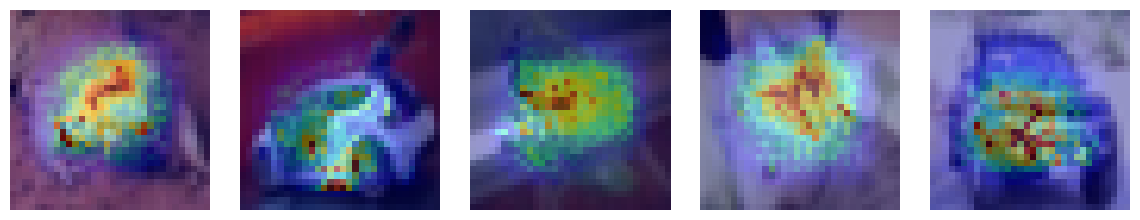



Method: VarGrad


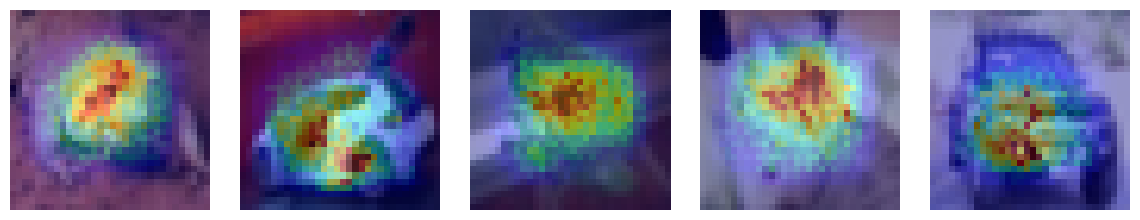



Method: GradCAM


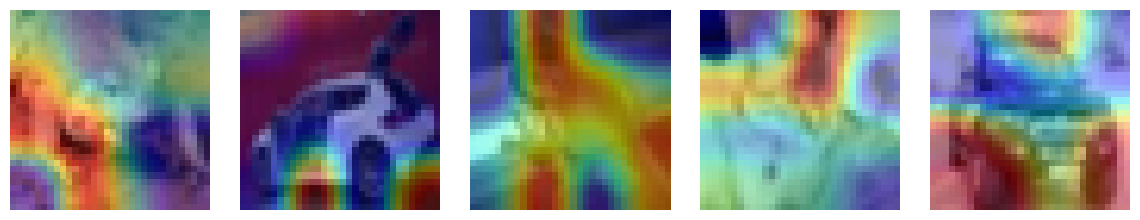



Method: Occlusion


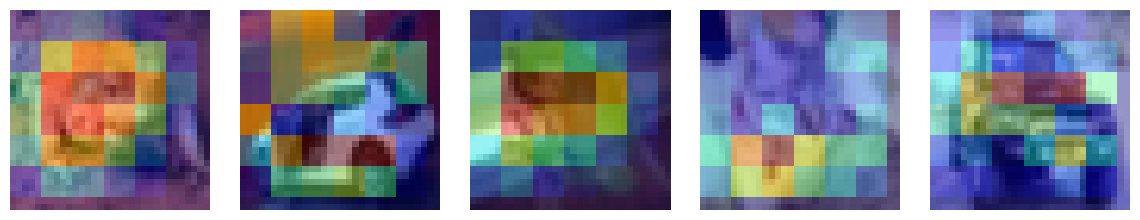



Method: Rise


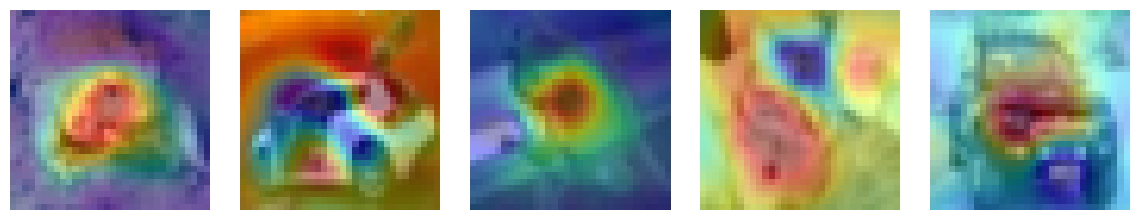



Method: SobolAttributionMethod


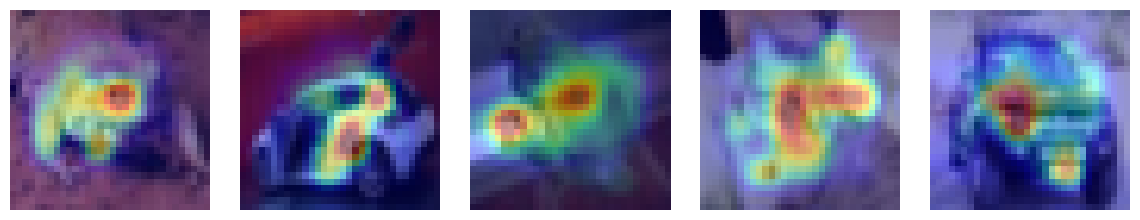

In [37]:
from xplique.attributions import (Saliency, GradientInput, IntegratedGradients, SmoothGrad, VarGrad,
                                  SquareGrad, GradCAM, Occlusion, Rise, GuidedBackprop,
                                  GradCAMPP, Lime, KernelShap, SobolAttributionMethod)
import tensorflow as tf
import xplique
from xplique.plots import plot_attributions
# explaining the logits is to explain the class,
# explaining the softmax is to explain why this class is more likely
# it is therefore recommended to explain the logit
model.layers[-1].activation = tf.keras.activations.linear
batch_size = 64
X = x_test[5:10]  
Y = y_test[5:10]
explainers = [
             Saliency(model),
             GradientInput(model),
             GuidedBackprop(model),
             IntegratedGradients(model, steps=80, batch_size=batch_size),
             SmoothGrad(model, nb_samples=80, batch_size=batch_size),
             SquareGrad(model, nb_samples=80, batch_size=batch_size),
             VarGrad(model, nb_samples=80, batch_size=batch_size),
             GradCAM(model),
             Occlusion(model, patch_size=10, patch_stride=5, batch_size=batch_size),
             Rise(model, nb_samples=4000, batch_size=batch_size),
             SobolAttributionMethod(model, batch_size=batch_size)
             # Lime(model, nb_samples = 1000),
             # KernelShap(model, nb_samples = 1000)
]
for i in range(len(X)):
    plt.subplot(1, len(X), i + 1)
    plt.imshow(X[i])  # Afficher l'image d'origine
 #   plt.imshow(explanations[i], cmap="jet", alpha=0.5)  # Superposer l'attribution
    plt.axis('off')
plt.show()
for explainer in explainers:

  explanations = explainer(X, Y)

  print(f"Method: {explainer.__class__.__name__}")
  plot_attributions(explanations, X, img_size=2., cmap='jet', alpha=0.4,
                    cols=len(X), absolute_value=True, clip_percentile=0.5)
  plt.show()
  print("\n")